In [1128]:
import numpy as np
from matplotlib import pyplot as plt
import json, os
from scipy.special import kn, iv
#plt.style.use("./tplot.mplstyle")

In [1336]:
run = 1
beta  = 0.3
alpha = 0.1
chi = 0.0
gamma = 5.0
D=1.0
K=1
#ct=1.0
#et=0.5

ddir = 'data' #'/new_drho_data'#
model = '/model_tanh_implicit_no_friction_u/' # '/model_hill'#

pdir = '../../'+ddir+model+'/D_{:1.1f}_K_{:d}/alpha_{:1.1f}_beta_{:1.4f}_chi_{:1.1f}_gamma_{:1.1f}/run_{:d}/'.format(D, K, alpha, beta, chi, gamma, run)

datadir = pdir+'data/'

with open(pdir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])
mu        = np.float32(parameters["mu"])
lambd        = np.float32(parameters["lambd"])
dx        = np.float32(parameters["dx"])
dy        = np.float32(parameters["dy"])
tauc      = np.float32(parameters["tauc"])
#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, mx*dx-tol, mx)
y   = np.linspace(0+tol, mx*dx-tol, my)
xv, yv  = np.meshgrid(x,y, indexing='ij')


times = np.arange(0, n_dump, 1)*dt_dump

print(n_dump, T, mx, dx, tauc)

10 100 200 0.5 100.0


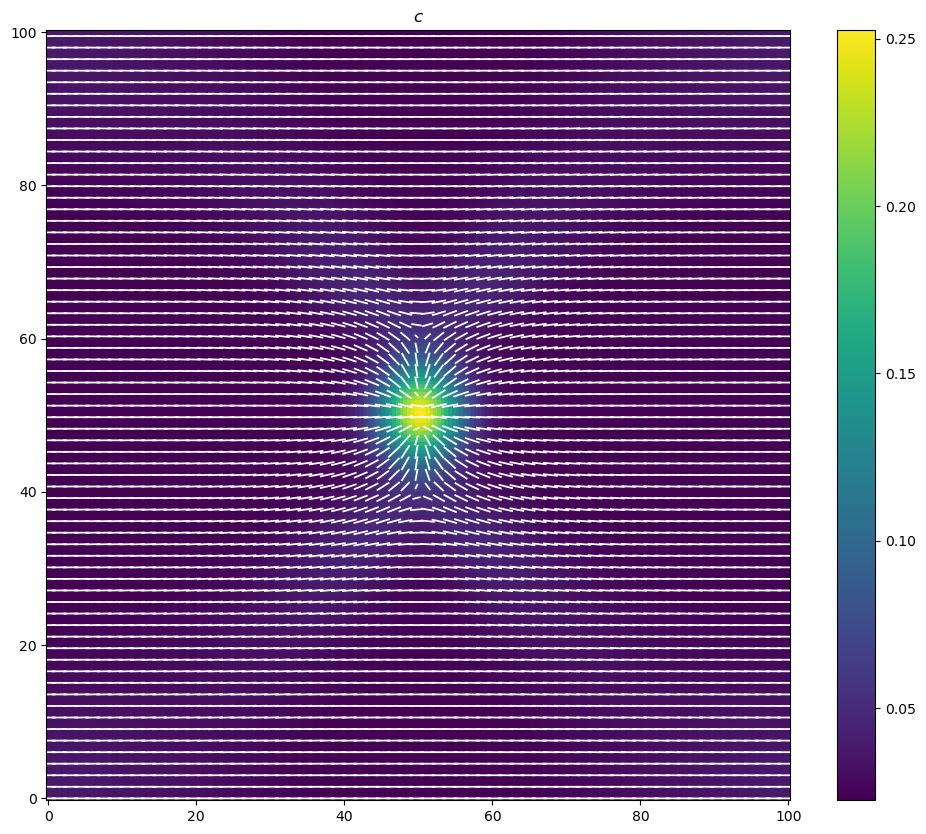

In [1337]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots(figsize=(12,10))
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
n=1

field = np.loadtxt(datadir+'c.csv.{:d}'.format(n), delimiter=',')
c=np.copy(field)
ct=0.1
denom = np.gradient(c, dx, dy)[1]**2 + np.gradient(c, dx, dy)[0]**2 +ct**2
cxx = gamma*(np.gradient(c, dx, dy)[1]**2-np.gradient(c, dx, dy)[0]**2)/2
cxy = gamma*(np.gradient(c, dx, dy)[1]*np.gradient(c, dx, dy)[0])

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
#Qxx = cxx/denom
#Qxy = cxy/denom
S = 2*np.sqrt(Qxx**2+Qxy**2)

p_factor = 3
theta = np.arctan2(Qxy, Qxx)/2
Snx    = S*np.cos(theta)
Sny    = S*np.sin(theta)

fmin = np.min(field); fmax = np.max(field)

ctrf = [ax.pcolormesh(xv, yv, field, vmin=fmin, vmax=fmax), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], Snx[::p_factor, ::p_factor], Sny[::p_factor, ::p_factor], color='w', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]
plt.colorbar(ctrf[0])
plt.title(r"$c$")
plt.show()

1.2583389507547242 0.00254907505068869 1.001954934395109
(array([100, 100, 100, 100]), array([ 80,  97, 103, 120]))


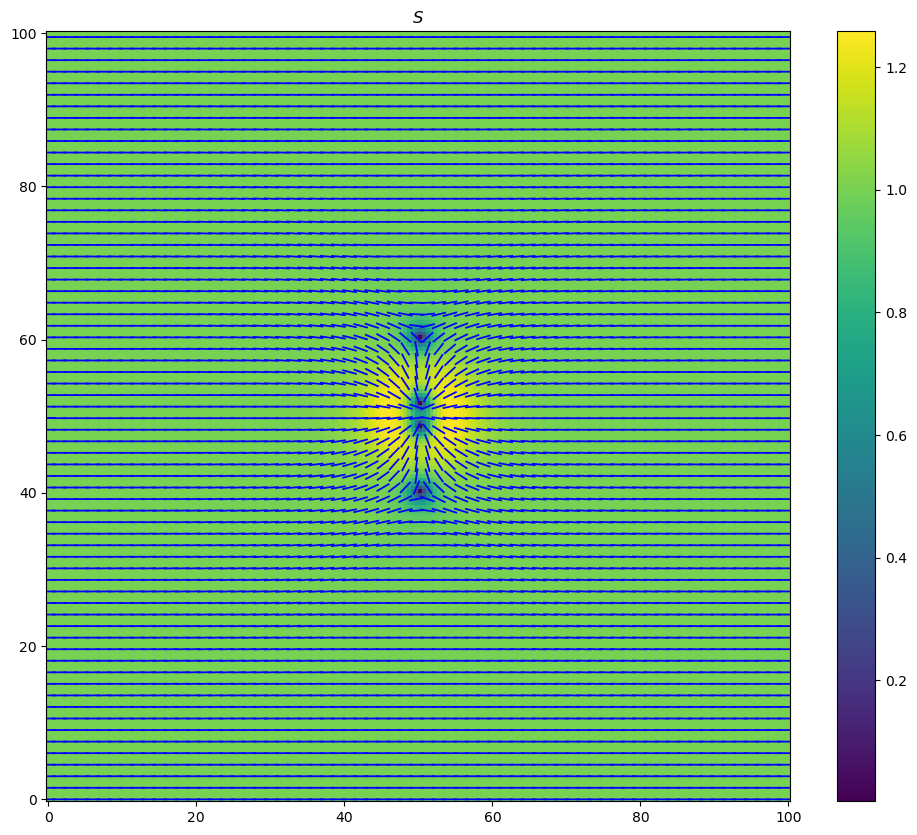

In [1340]:
fig, ax=plt.subplots(figsize=(12,10),nrows=1)
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=4

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = 2*np.sqrt(Qxx**2+Qxy**2)

p_factor = 3
theta = np.arctan2(Qxy, Qxx)/2
Snx    = np.cos(theta)
Sny    = np.sin(theta)
print(np.max(S), np.min(S), np.average(S))

print(np.where(S<0.2))

plot1 = [ax.pcolormesh(xv, yv, S, cmap='viridis', vmin=np.min(S), vmax=np.max(S)), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], Snx[::p_factor, ::p_factor], Sny[::p_factor, ::p_factor], color='b', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]

fig.colorbar(plot1[0], ax=ax)
ax.set_title(r"$ S $")
plt.show()

8.881784197001252e-16
80


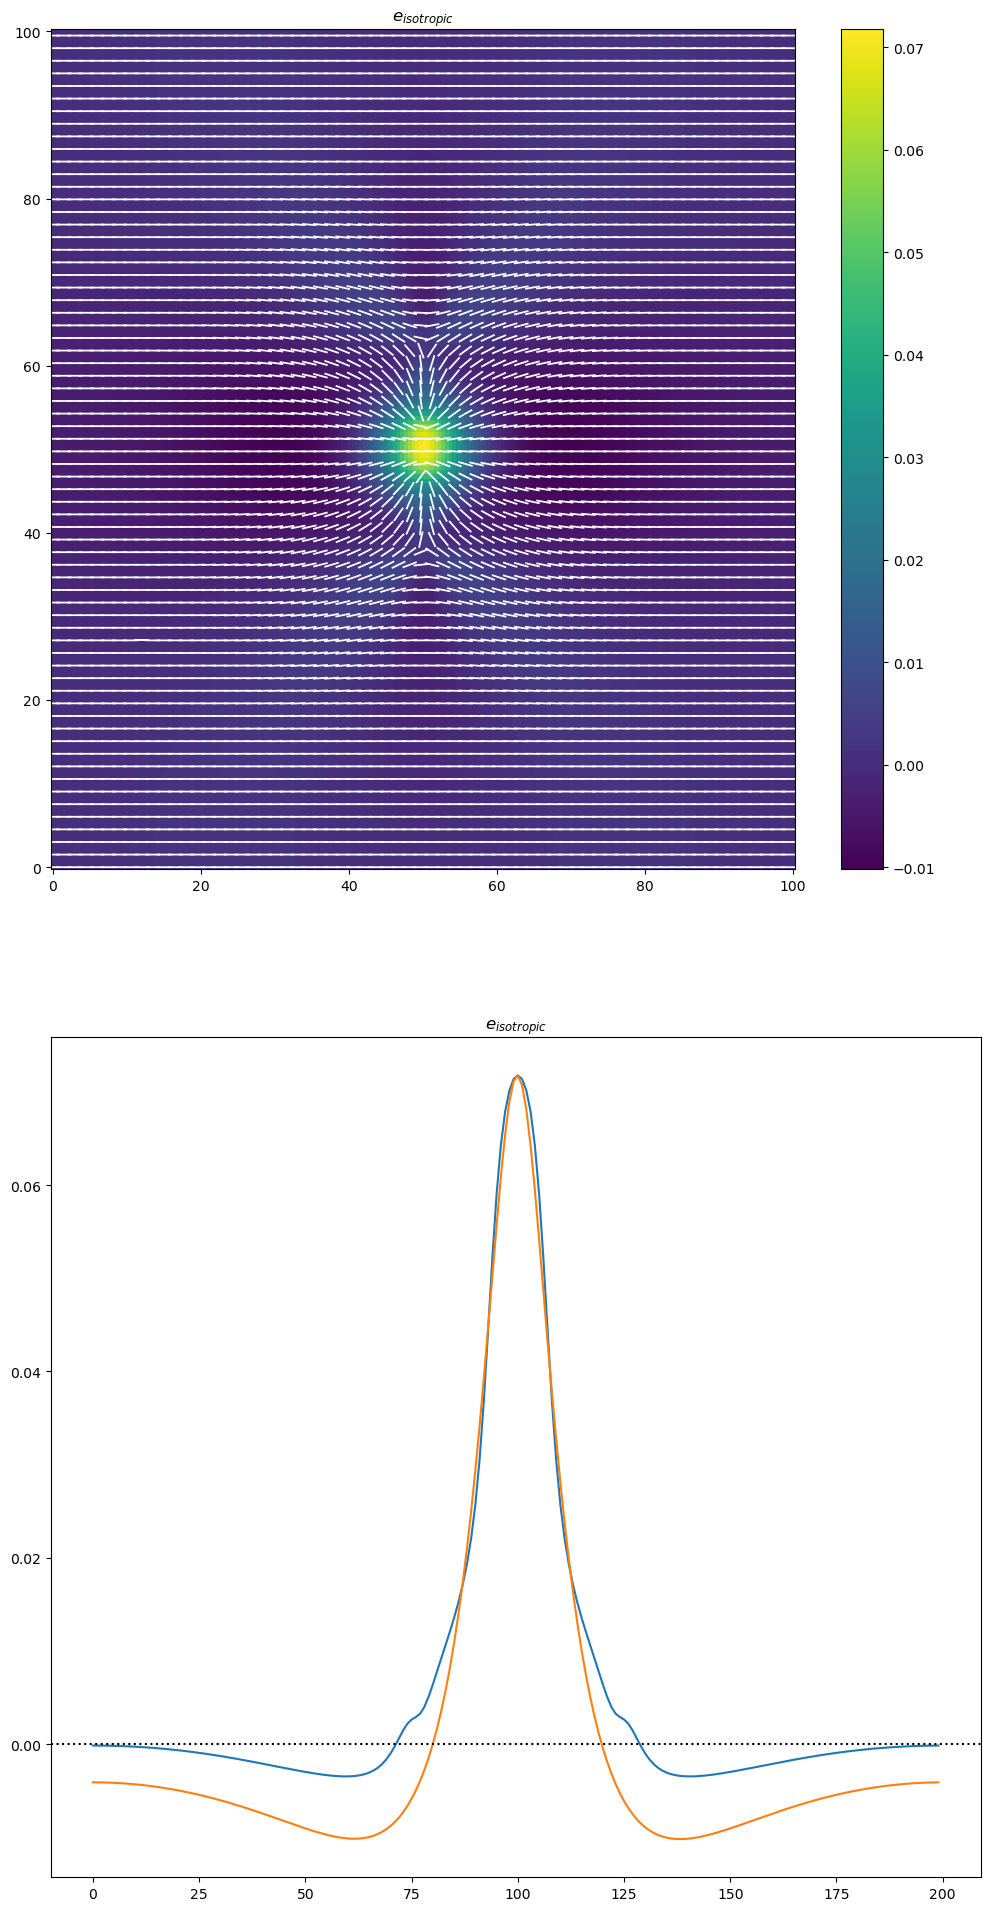

In [1325]:
n=98

e_iso = np.loadtxt(datadir+'eiso.csv.{:d}'.format(n), delimiter=',')
#e_iso += np.loadtxt(datadir+'eyy.csv.{:d}'.format(n), delimiter=',')
#e_iso = e_iso+np.abs(e_iso)
#exy = np.loadtxt(datadir+'exy.csv.{:d}'.format(n), delimiter=',')
print(np.sum(e_iso))

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = 2*np.sqrt(Qxx**2+Qxy**2)
p_factor=3
theta = np.arctan2(Qxy, Qxx)/2
#theta = np.arctan2(exy, (exx-eyy)/2)
Snx    = np.cos(theta)
Sny    = np.sin(theta)

fig, ax=plt.subplots(figsize=(12,24),nrows=2)
plot1 = [ax[0].pcolormesh(xv, yv, e_iso, cmap='viridis', vmin=np.min(e_iso), vmax=np.max(e_iso)), ax[0].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='1', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]
#plot2 = [ax[1].pcolormesh(xv, yv, exy, cmap='viridis', vmin=np.min(exy), vmax=np.max(exy)), ax[1].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='b', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]
ax[1].plot(e_iso[mx//2,:])
ax[1].plot(e_iso[:,mx//2])
ax[1].axhline(0, color='k', linestyle='dotted')
print(np.where(e_iso[:,mx//2]>0)[0][0])

fig.colorbar(plot1[0], ax=ax[0])
#fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ e_{isotropic} $")
ax[1].set_title(r"$ e_{isotropic} $")
plt.show()

2.842170943040401e-14
3.608224830031759e-16


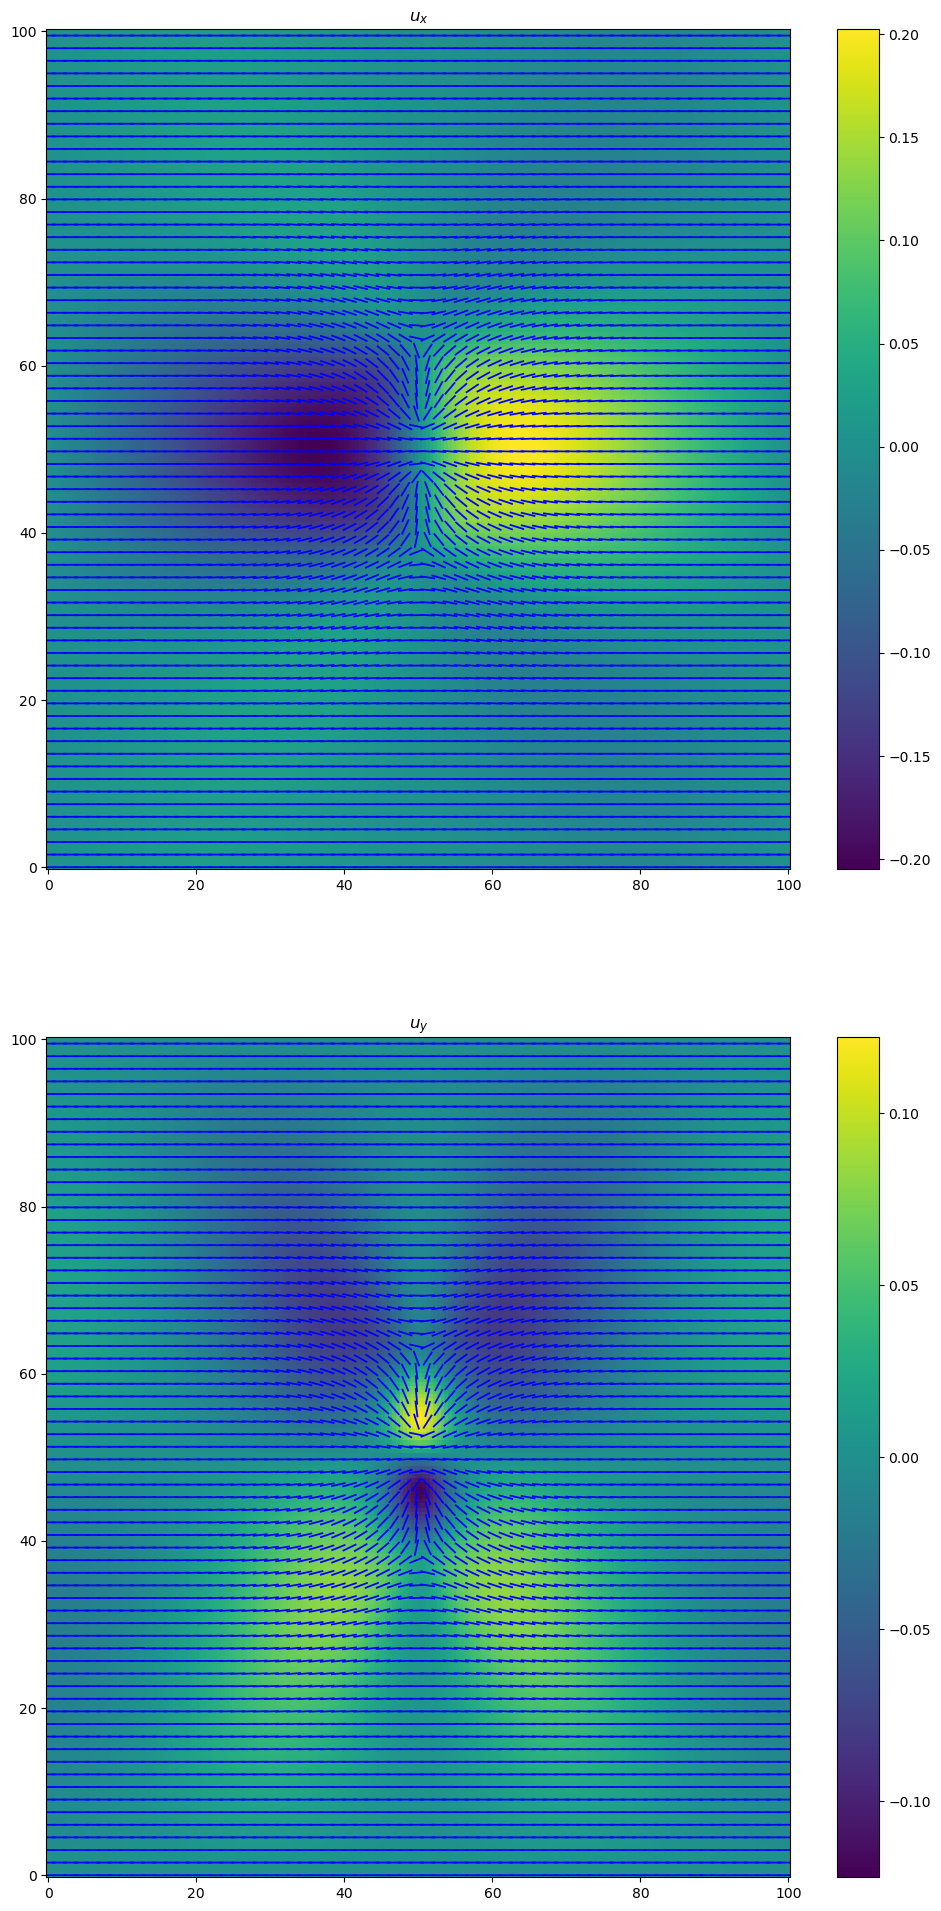

In [1327]:
ux = np.loadtxt(datadir+'ux.csv.{:d}'.format(n), delimiter=',')
uy = np.loadtxt(datadir+'uy.csv.{:d}'.format(n), delimiter=',')

print(np.sum(ux))
print(np.sum(uy))

Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')


S = np.sqrt(Qxx**2+Qxy**2)
p_factor=3
theta = np.arctan2(Qxy, Qxx)/2
Snx    = np.cos(theta)
Sny    = np.sin(theta)

fig, ax=plt.subplots(figsize=(12,24),nrows=2)
plot1 = [ax[0].pcolormesh(xv, yv, ux, cmap='viridis', vmin=np.min(ux), vmax=np.max(ux)), ax[0].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='b', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]
plot2 = [ax[1].pcolormesh(xv, yv, uy, cmap='viridis', vmin=np.min(uy), vmax=np.max(uy)), ax[1].quiver(xv[::p_factor, ::p_factor],yv[::p_factor, ::p_factor],Snx[::p_factor, ::p_factor],Sny[::p_factor, ::p_factor], color='b', pivot='middle', headlength=0, headaxislength=0, scale=0.5, scale_units='xy')]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ u_x $")
ax[1].set_title(r"$ u_y $")
plt.show()